<a href="https://colab.research.google.com/github/Sovit1056/Pytorch_practice/blob/main/03_Computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pytorch Computer Vision

## 0. Computer vision libaries in pytorch

| **Topic No.** | **Topic**                                    | **Contents**                                                                                                                                                |
| ------------- | -------------------------------------------- | ----------------------------------------------------------------------------------------------------------------------------------------------------------- |
| 0             | Computer vision libraries in PyTorch         | PyTorch has a bunch of built-in helpful computer vision libraries, let's check them out.                                                                    |
| 1             | Load data                                    | To practice computer vision, we'll start with some images of different pieces of clothing from FashionMNIST.                                                |
| 2             | Prepare data                                 | We've got some images, let's load them in with a PyTorch DataLoader so we can use them with our training loop.                                              |
| 3             | Model 0: Building a baseline model           | Here we'll create a multi-class classification model to learn patterns in the data, we'll also choose a loss function, optimizer and build a training loop. |
| 4             | Making predictions and evaluating model 0    | Let's make some predictions with our baseline model and evaluate them.                                                                                      |
| 5             | Setup device agnostic code for future models | It's best practice to write device-agnostic code, so let's set it up.                                                                                       |
| 6             | Model 1: Adding non-linearity                | Experimenting is a large part of machine learning, let's try and improve upon our baseline model by adding non-linear layers.                               |
| 7             | Model 2: Convolutional Neural Network (CNN)  | Time to get computer vision specific and introduce the powerful convolutional neural network architecture.                                                  |
| 8             | Comparing our models                         | We've built three different models, let's compare them.                                                                                                     |
| 9             | Evaluating our best model                    | Let's make some predictions on random images and evaluate our best model.                                                                                   |
| 10            | Making a confusion matrix                    | A confusion matrix is a great way to evaluate a classification model, let's see how we can make one.                                                        |
| 11            | Saving and loading the best performing model | Since we might want to use our model for later, let's save it and make sure it loads back in correctly.                                                     |


| **PyTorch Module**            | **What does it do?**                                                                                                                                                                |
| ----------------------------- | ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| `torchvision`                 | Contains datasets, model architectures, and image transformations often used for computer vision problems.                                                                          |
| `torchvision.datasets`        | Provides many example computer vision datasets for tasks like image classification, object detection, image captioning, video classification, and base classes for custom datasets. |
| `torchvision.models`          | Contains well-performing and commonly used computer vision model architectures implemented in PyTorch for direct use in your problems.                                              |
| `torchvision.transforms`      | Provides common image transformations needed to process, convert to tensors, normalize, and augment images before feeding them into a model.                                        |
| `torch.utils.data.Dataset`    | Base dataset class for PyTorch, useful for creating custom datasets by subclassing it.                                                                                              |
| `torch.utils.data.DataLoader` | Creates a Python iterable over a dataset (created with `torch.utils.data.Dataset`) enabling batching, shuffling, and parallel data loading.                                         |
| `torch.nn`            | Provides layers, activations, losses, and neural network building blocks to construct models.                                   |
| `torch.optim`         | Contains optimization algorithms (SGD, Adam, RMSProp) to update model parameters during training.                               |
| `torch.nn.functional` | Provides functions for operations like activation functions, loss functions, and other computations used inside forward passes. |
| `torch.cuda`          | Enables CUDA GPU operations for faster model training and inference.                                                            |
| `torch.autograd`      | Provides automatic differentiation for building and training neural networks (computes gradients automatically).                |


In [38]:
# Import PyTorch
import torch
from torch import nn

# import torch vision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# import Matplotlib for visualization
import matplotlib.pyplot as plt

## 1. Geting a tensor

The dataset we'll be using fashionMNIST from torchvision.datasets-

https://docs.pytorch.org/vision/stable/generated/torchvision.datasets.FashionMNIST.html

In [39]:
# Setting up training data

train_data=datasets.FashionMNIST(
    root = "data",            # where to download data to?
    train = True,             # do we want the trining datasets
    download = True,          # do we want to download Y/N?
    transform = ToTensor(),   # how to transform the data? https://docs.pytorch.org/vision/stable/generated/torchvision.transforms.ToTensor.html
    target_transform = None   # how to transform the labels/tragets?
)

test_data= datasets.FashionMNIST(
    root= "data",
    train = False,
    download = True,
    transform = ToTensor(),
    target_transform = None
)

In [40]:
len(train_data), len(test_data)

(60000, 10000)

In [41]:
image, label = train_data[0]
print(image)
image.shape, label

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
          0.2863, 0.0000, 0.0000, 0.0039, 0.0157, 0.0000,

(torch.Size([1, 28, 28]), 9)

In [42]:
class_names= train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [43]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [44]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

### 1.1 Visualizing our data

Image shape: torch.Size([1, 28, 28])
Label: 9, Class: Ankle boot


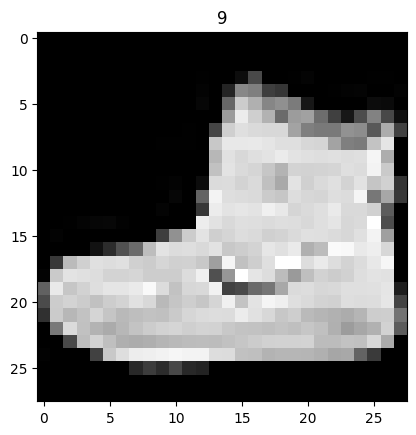

In [45]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"Image shape: {image.shape}")
print(f"Label: {label}, Class: {class_names[label]}")
plt.imshow(image.squeeze(), cmap="gray")
plt.title(label);

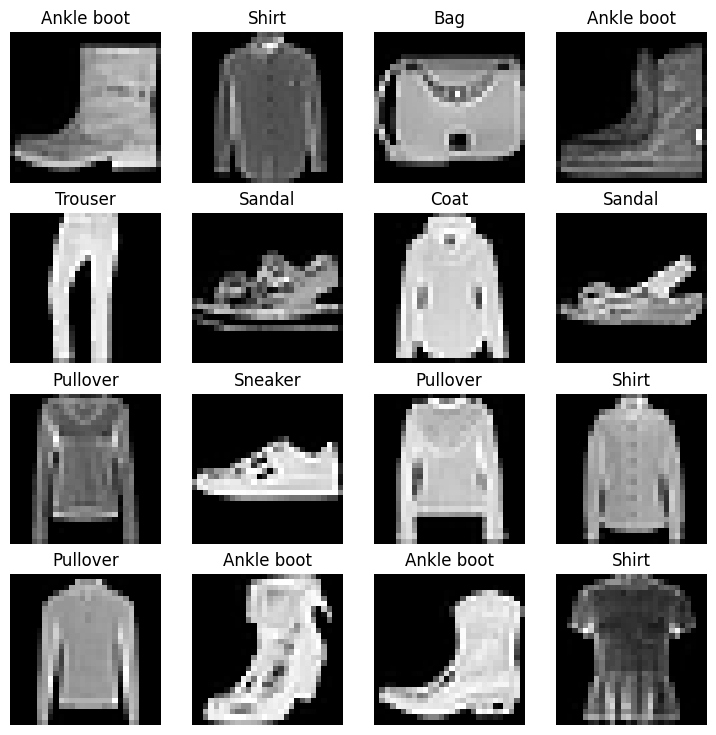

In [46]:
# plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4,4
for i in range (1,rows*cols+1):
  random_idx= torch.randint(0, len(train_data), size=[1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(class_names[label])
  plt.axis(False)

In [47]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

## 2. Prepare DataLoader

Right now, our data is in the form of PyTorch Datasets.

DataLoader turns our dataset into a Python iterable.

More specifically, we want to turn our data into batches ( or mini-batehes).

Why would we do this?

1. It is more computational efficient
2. It gives our network more chances to update its gradient per epoch.

In [48]:
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter
BATCH_SIZE = 32       # what happens if we keep it 1 and different values

# Trun datasets into interables (batches)
train_dataloader = DataLoader( dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)
test_dataloader= DataLoader( dataset=test_data,
                            batch_size= BATCH_SIZE,
                             shuffle= False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7b4e8bfad650>,
 <torch.utils.data.dataloader.DataLoader at 0x7b4e85f91f50>)

In [49]:
# Let's check out what we've crerated
print(f"Dataloader: {train_dataloader}\n{test_dataloader}\n")
print(f"Length of train dataloader: {len(train_dataloader)}\n")
print(f"Length of test dataloader: {len(test_dataloader)}")

Dataloader: <torch.utils.data.dataloader.DataLoader object at 0x7b4e8bfad650>

Length of train dataloader: 1875

Length of test dataloader: 313


Its has created 1875 dataset of 32 batches as far as possible

In [50]:
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
              # 🔹 iter() creates an iterator from DataLoader
              # 🔹 next() gets the next batch (first batch here)
              # 🔹 Together, next(iter(train_dataloader)) fetches one batch immediately for inspection or testing.
print(f"The lenght of train_features_batch: {len(train_features_batch)}\n")
print(f"The lenght of train_labels_batch: {len(train_labels_batch)}\n")
train_features_batch.shape, train_labels_batch.shape

The lenght of train_features_batch: 32

The lenght of train_labels_batch: 32



(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
 Label: 8, Class: Bag


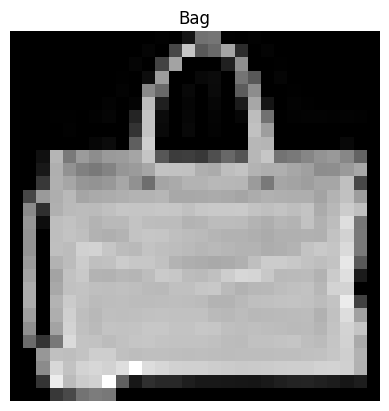

In [51]:
# Show a sample
#torch.manual_seed(42)
random_idx= torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx],train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image size: {img.shape}")
print(f" Label: {label}, Class: {class_names[label]}")

## 3. Model 0: Build a baseline model

When starting to build a series of machine learining modelling experiments, it's best practice to start with baseline model.

A baseline model is a simple model you will try and improve upon with subsequent models/experiments.

In other words: start simply and add complexity when necessary.

In [52]:
# Creating the flatten layer
flatten_model= nn.Flatten()

# Get a single sample
x = train_features_batch[0]
print(f'Shape before flattening: {x.shape}')

# Flatten the sample
x = flatten_model(x).squeeze()
print(f'Shape after flattening: {x.shape}')

Shape before flattening: torch.Size([1, 28, 28])
Shape after flattening: torch.Size([784])


✅ Key Takeaways on Flatten and Fully Connected Layers in CNNs

🔹 1. Why do we Flatten?

Convolutional + Pooling layers output multi-dimensional feature maps (C, H, W).

Fully connected layers (nn.Linear) require 1D input per sample.

Flatten reshapes these feature maps into a single feature vector to connect feature extraction (Conv) with decision making (Dense).



🔹 2. What does Flatten do?
Converts data from:

(channels, height, width) → (features,)
e.g. (32, 7, 7) → (1568,).


🔹 3. Why can’t other layers replace Flatten?
* Conv2:  Performs filtering, maintains spatial dimensions
* Pooling:	Downsamples, does not flatten to 1D
* Activation (ReLU, Sigmoid):	Applies non-linearity, no reshaping
* BatchNorm, Dropout: Normalization/regularization only
* nn.Linear:	Requires input already flattened

✅ Only Flatten reshapes data without changing its values.

🔹 4. Alternatives to Flatten

x.view(x.shape[0], -1) or x.reshape(x.shape[0], -1)

➔ Same effect as nn.Flatten(), but as tensor operations instead of module layers.

🔹 5. Is Flatten always necessary?

Necessary when: Moving from Conv/Pool layers to Fully Connected layers for classification/regression.

Not necessary when:

* Using Global Average Pooling to reduce spatial dimensions (e.g. AdaptiveAvgPool2d).

* Model is Fully Convolutional Network (FCN) (e.g. segmentation, detection heads).

* Input is already a 1D vector (e.g. tabular data).

🔹 6. Why do we use Fully Connected Layers after Conv/Pool?
* Combine all extracted features globally to make final decisions.

* Act as classifiers or regressors after feature extraction by Conv layers.

* Implemented via nn.Linear(in_features, out_features) for matrix multiplication outputting class logits or regression values.

🔹 7. Analogy

Convolutional + Pooling layers: Feature specialists extracting local patterns.

* Flatten: Converts all features into a single list for final processing.

* Fully Connected layers: The decision-maker using all features to classify or regress.

✅ Final One-Line Summary

✔ Flatten bridges the gap between feature extraction (Conv) and decision making (Dense), enabling final predictions in CNNs.

In [53]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),         # the use of the flatten is fanilizing looking the the documentation provide by pytorch
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape)
    )

  def forward(self,x):
    return self.layer_stack(x)


In [54]:
torch.manual_seed(42)

# Setup model with input parameter
model_0 = FashionMNISTModelV0(input_shape= 28*28,      # 28*28
                              hidden_units=10,
                              output_shape=len(class_names))  # one for every class must be output

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [55]:
dummy_x= torch.rand(1,1,28,28)
dummy_x.shape
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [56]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

### 3.1 Loss function, optimizer and evaluation metrics

* Loss function - since we are working with multiclass: `nn.CrossEntropyLoss()`
* Optimizer - let stick with `torch.optim.SDG()`
* Evaluation metric - accuracy

In [57]:
# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100
    return acc


In [58]:
# Set up loss function
loss_fn = nn.CrossEntropyLoss()

# Set up optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

### 3.2 Creating a function to time our experiments

Two of the main things we'll often want to track are:
1. Model's performance (loss and accuracy values etc)
2. How fast it runs

In [59]:
from timeit import default_timer as timer
def print_train_time( start: float,
                      end: float,
                      device: torch.device = None):
  """Prints difference between start and end time."""

  total_time = end - start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time



In [60]:
start_time = timer()
# we write code inside it
end_time = timer()
print_train_time(start_time, end_time)

Train time on None: 0.000 seconds


4.606899994996638e-05

### 3.3 Creating a training loop and trainniig the model on the batches of data

1. Loop through epochs.
2. Loop through training batches, perform training sets , calculate the train loss *per batch*
3. Loop through teting batches, perform testing steps, calculate the test loss *per batch*
4. Print out what happened


In [61]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
train_start_time = timer()

# Set the number of epochs
epochs = 5
# Loop through the epochs
for epoch in tqdm(range(epochs)):  ##only added tqdm for timer
  print(f"Epoch: {epoch}\n-------")

  ### Training
  train_loss = 0

  # Loop through the training batches **********************************************************************
  for batch, (X, y) in enumerate(train_dataloader):   # x= image and  y = labels/target
                                                           #   (enumerate) To keep track of the batch number in the loop, useful for:
                                                             # Printing progress.
                                                             # Logging training statistics per batch.
                                                             # Conditional operations every N batches.
    model_0.train()
    # 1. Forward pass
    y_pred = model_0(X)

    # 2. Calculate loss (per batch)
    loss = loss_fn(y_pred, y)
    train_loss += loss   # accumulate the train loss and avg is found at last

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    # print out what is happening
    if batch % 500 == 0:
      print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")

  # Divide total train loss by length of train dataloader as per line 27
  train_loss /= len(train_dataloader)

  ### Testing
  test_loss, test_acc = 0, 0
  model_0.eval()
  with torch.inference_mode():
    for X_test, y_test in test_dataloader:
      # Forward pass
      test_pred = model_0(X_test)
      # Calculate loss and accuracy
      test_loss += loss_fn(test_pred, y_test)
      test_acc += accuracy_fn(y_true=y_test,
                              y_pred=test_pred.argmax(dim=1))
    # Caalulate loss and accuracy per batches fr test data
    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)

  # Vusualization
  print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")

#calculate training time
train_end_time = timer()
total_train_time_model_0 = print_train_time(start=train_start_time,
                                            end=train_end_time,
                                            device=str(next(model_0.parameters()).device))


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
-------
Looked at 0/60000 samples
Looked at 16000/60000 samples
Looked at 32000/60000 samples
Looked at 48000/60000 samples

Train loss: 0.59039 | Test loss: 0.50954, Test acc: 82.04%

Epoch: 1
-------
Looked at 0/60000 samples
Looked at 16000/60000 samples
Looked at 32000/60000 samples
Looked at 48000/60000 samples

Train loss: 0.47633 | Test loss: 0.47989, Test acc: 83.20%

Epoch: 2
-------
Looked at 0/60000 samples
Looked at 16000/60000 samples
Looked at 32000/60000 samples
Looked at 48000/60000 samples

Train loss: 0.45503 | Test loss: 0.47664, Test acc: 83.43%

Epoch: 3
-------
Looked at 0/60000 samples
Looked at 16000/60000 samples
Looked at 32000/60000 samples
Looked at 48000/60000 samples

Train loss: 0.44251 | Test loss: 0.46306, Test acc: 83.75%

Epoch: 4
-------
Looked at 0/60000 samples
Looked at 16000/60000 samples
Looked at 32000/60000 samples
Looked at 48000/60000 samples

Train loss: 0.43582 | Test loss: 0.46869, Test acc: 83.27%

Train time on cpu: 47.120 seco

## 4. Make prediction and get Model_0 results

In [62]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
    """Returns a dictionary containing the results of model predicting on data_loader."""

    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X,y in data_loader:
            # Make predictions
            y_pred = model(X)


            # Accumulate the loss and acc values per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y,
                               y_pred=y_pred.argmax(dim=1))

        # Scle loss and acc to find the average loss/acc per batch

        loss /= len(data_loader)
        acc /= len(data_loader)

    return {"model_name": model.__class__.__name__,  # only works when model was created with a class
            "model_loss": loss.item(),             # .item() change to single form
            "model_acc": acc}

# Calculate model 0 result on test dataset
model_0_results = eval_model(model=model_0,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.4686937928199768,
 'model_acc': 83.2667731629393}

## 5. Setup device agnotic-code (for using GPU if there is one)

In [63]:
!nvidia-smi

Tue Jul 15 11:20:52 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   75C    P0             31W /   70W |     150MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [64]:
torch.cuda.is_available()

True

In [65]:
# Setup device-agnostic code
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"


## 6. Model 1: Building a better model with non-linearity

In [66]:
# Create a model with non-linearity
class FashionMNISTModelV1(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units_one: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units_one),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units_one,
                  out_features=output_shape),

    )

  def forward(self, x: torch.Tensor):
    return self.layer_stack(x)


In [67]:
next(model_0.parameters()).device

device(type='cpu')

In [68]:
# Create an instance of model_0:  to run the model in Cuda instead of cpu
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape= 28*28,
                              hidden_units_one= 10,
                              output_shape= len(class_names)).to(device)

next(model_1.parameters()).device


device(type='cuda', index=0)

In [69]:
# Loss funtion for model1
loss_fn = nn.CrossEntropyLoss()

# Optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)


In [70]:
# need accuracy function also
# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100
    return acc


### 6.2 Functionizing training and evaluation/test loop

* Training loop function

In [87]:
# Creating the function for training and testing loop

def training_loop(model: torch.nn.Module,
                  data_loader: torch.utils.data.DataLoader,
                  loss_fn: torch.nn.Module,
                  optimizer: torch.optim.Optimizer,
                  accuracy_fn,
                  device: torch.device = device):

  ###Performs a training loop for a PyTorch model.###
  train_loss, train_acc = 0, 0

  # putting model into training mode
  model.train()

  # Loop through the training batches **********************************************************************
  for batch, (X, y) in enumerate(data_loader):

    #Put data on traget device
    X,y= X.to(device), y.to(device)

    # 1. Forward pass
    y_pred = model(X)

    # 2. Calculate loss (per batch)
    loss = loss_fn(y_pred, y)
    train_loss += loss   # accumulate the train loss and avg is found at last
    train_acc += accuracy_fn(y_true=y,
                             y_pred=y_pred.argmax(dim=1))

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    # print out what is happening
    if batch % 500 == 0:
      print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")

  # Divide total train loss by length of train dataloader
  train_loss /= len(train_dataloader)
  train_acc /= len(train_dataloader)

  print(f"Train loss: {train_loss:.5f} |  Train accuracy: {train_acc:.2f}%")




* Testing loop function

In [88]:
def testing_loop(model: torch.nn.Module,
                  data_loader: torch.utils.data.DataLoader,
                  loss_fn: torch.nn.Module,
                  accuracy_fn,
                  device: torch.device = device):

  ### Performs a testing loop for a model

  test_loss, test_acc = 0, 0

  # putting into evaluation mode
  model.eval()

  # truning on inference mode context manager
  with torch.inference_mode():
    for X, y in data_loader:     ## we can only use X,y insted of X-test,y_test as we are inside the function

      # Set the data to the target device
      X, y = X.to(device), y.to(device)

      # Forward pass
      test_pred = model(X)

      # Calculate loss and accuracy
      test_loss += loss_fn(test_pred, y)
      test_acc += accuracy_fn(y_true=y,
                              y_pred=test_pred.argmax(dim=1))

    # Calulate loss and accuracy per batches for test data
    test_loss /= len(data_loader)
    test_acc /= len(data_loader)

    # Vusualization
    print(f"Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")


In [89]:
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_start_time_on_gpu = timer()

# Set epochs
epochs = 5

# Create a optimization and evaluation loop using functions
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-------")
  training_loop(model=model_1,
                data_loader=train_dataloader,
                loss_fn=loss_fn,
                optimizer=optimizer,
                accuracy_fn=accuracy_fn,
                device=device)
  testing_loop(model=model_1,
                data_loader=test_dataloader,
                loss_fn=loss_fn,
                accuracy_fn=accuracy_fn,
                device=device)

train_time_end_on_gpu= timer()
total_train_time_model_1= print_train_time(start= train_start_time_on_gpu,
                                           end= train_time_end_on_gpu,
                                           device= device)


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
-------
Looked at 0/60000 samples
Looked at 16000/60000 samples
Looked at 32000/60000 samples
Looked at 48000/60000 samples
Train loss: 1.09199 |  Train accuracy: 61.34%
Test loss: 0.95636, Test acc: 65.00%

Epoch: 1
-------
Looked at 0/60000 samples
Looked at 16000/60000 samples
Looked at 32000/60000 samples
Looked at 48000/60000 samples
Train loss: 0.78101 |  Train accuracy: 71.93%
Test loss: 0.72227, Test acc: 73.91%

Epoch: 2
-------
Looked at 0/60000 samples
Looked at 16000/60000 samples
Looked at 32000/60000 samples
Looked at 48000/60000 samples
Train loss: 0.67027 |  Train accuracy: 75.94%
Test loss: 0.68500, Test acc: 75.02%

Epoch: 3
-------
Looked at 0/60000 samples
Looked at 16000/60000 samples
Looked at 32000/60000 samples
Looked at 48000/60000 samples
Train loss: 0.64384 |  Train accuracy: 76.52%
Test loss: 0.65079, Test acc: 76.13%

Epoch: 4
-------
Looked at 0/60000 samples
Looked at 16000/60000 samples
Looked at 32000/60000 samples
Looked at 48000/60000 samples

**Note:** Sometime, depending on our data/hardware we might find that your odel trains faster on CPU than GPU (as above)

Why is this?

1. It could be that the overhead for copying data/model to and from the GPU
outweights the compute benefits offered by the GPU
2. The hardware we're using has a better CPU in terms compute capability than the GPU.

For more on how to make our models compute faster, see here: https://horace.io/brrr_intro.html


In [90]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.4686937928199768,
 'model_acc': 83.2667731629393}

In [94]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device = device):
    """Returns a dictionary containing the results of model predicting on data_loader."""

    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X,y in data_loader:

            # Make code device agnostic
            X, y = X.to(device), y.to(device)

            # Make predictions
            y_pred = model(X)


            # Accumulate the loss and acc values per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y,
                               y_pred=y_pred.argmax(dim=1))

        # Scle loss and acc to find the average loss/acc per batch

        loss /= len(data_loader)
        acc /= len(data_loader)

    return {"model_name": model.__class__.__name__,  # only works when model was created with a class
            "model_loss": loss.item(),             # .item() change to single form
            "model_acc": acc}

In [95]:
# Getting model_1 results dictionary
model_1_results = eval_model(model=model_1,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             device=device)
model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6527653932571411,
 'model_acc': 75.94848242811501}

In [96]:
model_0_results,model_1_results

({'model_name': 'FashionMNISTModelV0',
  'model_loss': 0.4686937928199768,
  'model_acc': 83.2667731629393},
 {'model_name': 'FashionMNISTModelV1',
  'model_loss': 0.6527653932571411,
  'model_acc': 75.94848242811501})